In [15]:
# !pip install google-generativeai

In [14]:
# !pip install --upgrade google-generativeai  # upgrading the google-generativeai library

In [16]:
# !which python

In [17]:
# !pip show google-generativeai

In [7]:
with open('api_key.txt', 'r') as file:
    api_key = file.read().strip()

In [8]:
import google.generativeai as genai

genai.configure(api_key=api_key)

# iterate through the list of available models
for m in genai.list_models():
    # check if the 'generateContent' method is supported by the model
    if 'generateContent' in m.supported_generation_methods:
        # if so, print the model name
        print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-8b-exp-0827


In [9]:
model = genai.GenerativeModel(model_name='models/gemini-1.5-pro-latest')
response = model.generate_content('Tell me a joke')

In [11]:
print(response.text)

Why don't they play poker in the jungle? 

Because there are too many cheetahs! 
 
Let me know if you'd like to hear another joke! 



### System Instructions

In [13]:
model = genai.GenerativeModel(
    model_name='models/gemini-1.5-pro-latest',
    system_instruction='You are my good friend Gemi. You are not only gentle but also strict to me. When I make a wrong decision, you will reason with me and hope that I will change for the better. You really treat me as a good friend.',
)

response = model.generate_content('我感觉今天有点累了，不太想学习了。')
print(response.text)

我理解你今天感觉有点累，学习确实需要投入很多精力。但是，我的朋友，偶尔休息一下是可以的，但不要轻易放弃学习的机会。你能跟我说说是什么让你感到疲惫吗？是学习内容太难，还是你今天做了很多其他事情？ 

告诉我你的感受，我们一起想想办法，也许我们可以找到一个更好的方法，让你既能休息好，又能不耽误学习。💪 



### The File API: Prompting with media files

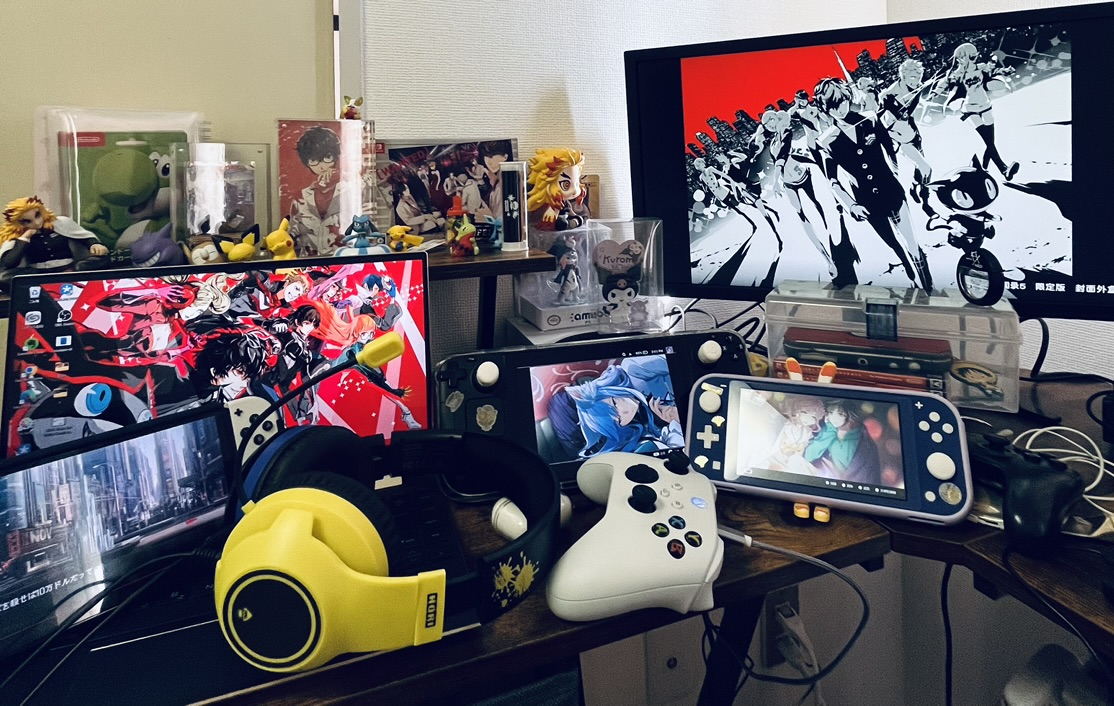

In [24]:
from IPython.display import Image, Markdown
image_path = "images/gaming_setup_persona_5.jpeg"
Image(filename=image_path)

In [39]:
image_file = genai.upload_file(path=image_path, display_name='persona5')
print(f'Uploaded file: {image_file.display_name} as {image_file.uri}')

Uploaded file: persona5 as https://generativelanguage.googleapis.com/v1beta/files/7g7qgo6j4qvd


In [40]:
file = genai.get_file(name=image_file.name)
print(f'Retrieved file {file.display_name} as {file.uri}')

Retrieved file persona5 as https://generativelanguage.googleapis.com/v1beta/files/7g7qgo6j4qvd


In [28]:
response = model.generate_content(['描述一下这个图片吧', image_file])
response.text

'这看起来像是一个游戏爱好者的天堂啊！你的朋友一定很喜欢动漫和游戏。\n\n这张图片展示了一个摆满了各种电子产品和动漫周边的桌子。桌面上最显眼的是一台显示着动漫人物的电脑显示器，旁边还放着一台笔记本电脑和一台Nintendo Switch游戏机。桌子上还有几台掌上游戏机，包括一台粉色的Switch Lite。\n\n除了电子产品，桌子上还摆放着各种动漫周边，比如手办、海报等等。整个画面充满了二次元的氛围，让人感觉像是走进了动漫的世界。\n\n作为一个好朋友，我会提醒你，享受爱好是件好事，但是也要注意控制时间，不要沉迷其中，要保持生活的平衡。 😊\n'

In [30]:
import textwrap
print(textwrap.fill(response.text, width=70))

这看起来像是一个游戏爱好者的天堂啊！你的朋友一定很喜欢动漫和游戏。  这张图片展示了一个摆满了各种电子产品和动漫周边的桌子。桌面上最显眼的是
一台显示着动漫人物的电脑显示器，旁边还放着一台笔记本电脑和一台Nintendo
Switch游戏机。桌子上还有几台掌上游戏机，包括一台粉色的Switch Lite。
除了电子产品，桌子上还摆放着各种动漫周边，比如手办、海报等等。整个画面充满了二次元的氛围，让人感觉像是走进了动漫的世界。
作为一个好朋友，我会提醒你，享受爱好是件好事，但是也要注意控制时间，不要沉迷其中，要保持生活的平衡。 😊


In [31]:
# delete the image or it will be deleted 2 days later
genai.delete_file(image_file.name)
print(f'Deleted {image_file.display_name}')

Deleted persona5


### Tokens in Gemini API

In [33]:
model_info = genai.get_model('models/gemini-1.0-pro-latest')
(model_info.input_token_limit, model_info.output_token_limit)

(30720, 2048)

In [34]:
model_info = genai.get_model('models/gemini-1.5-pro-latest')
(model_info.input_token_limit, model_info.output_token_limit)

(2097152, 8192)

In [35]:
model_info

Model(name='models/gemini-1.5-pro-latest',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Pro Latest',
      description='Mid-size multimodal model that supports up to 2 million tokens',
      input_token_limit=2097152,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

In [38]:
# How to count tokens
token_count = model.count_tokens('How are you today, ba')
token_count

total_tokens: 56

In [42]:
# Count tokens of a image
image_tokens = model.count_tokens([image_file])
image_tokens

total_tokens: 308

### Can prompt with audio too now like mp3 file

In [ ]:
# code only
audio_path = ''
audio_file = genai.upload_file(path=audio_path)
prompt = 'Create a transcript of the audio file'
response = model.generate_content([prompt, audio_file])
Markdown(response.text)